In [1]:
#Making the necessary imports
import os
import numpy as np
from numpy import matrix
import scipy.optimize as theMinimiser
from iminuit import Minuit
import math
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.special import erfinv
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import erfinv, erf

%matplotlib inline

## Problem 1 (2 points):

### a)

H null corresponds to the manufacturer telling the truth and having 5% of manufactured monitors being faulty.

We want to find the probability of there being more faulty monitors than our threshold value given that the the null hypothesis is true. 

This means we want to find probability of there being 10 or more faulty monitors out of 100 given that the probability of there being a faulty monitor is 5%.

In [2]:
prob_t1 = 0
for i in range(10,101):
    prob_t1 += binom.pmf(i,100,0.05)

In [3]:
print("Probability of type 1 error at our threshold is: ",100*round(prob_t1,5),"%")

Probability of type 1 error at our threshold is:  2.819 %


### b)

H1 corresponds to the manufacturer not telling the truth and the actual rate of faulty monitors being 15%.

To calculate the probability of a type 2 error we want to find the probability of rejecting H1 at our threshold value given that H1 is correct.

This means we want to find the probability of accepting H0 given that H1 is true.

We want to find the probability of there being 9 or less faulty monitors given that the true faulty rate is 15%

In [4]:
prob_t2 = 0
for i in range(0,10):
    #print(i,binom.pmf(i,100,0.15))
    prob_t2 += binom.pmf(i,100,0.15)

In [5]:
print("Probability of type 2 error at our threshold is: ", 100*round(prob_t2,5),"%")

Probability of type 2 error at our threshold is:  5.509 %


## Problem 2 (3 points):

In [6]:
class Gaussian:
    def __init__(self, mean, sigma):
        self.mean = mean
        self.sigma = sigma
    
    def integralAbove(self,xval) :
        gaussian = lambda x: (1/(self.sigma*np.sqrt(2*math.pi)))*np.exp((-1/2)*((x-self.mean)/self.sigma)**2)
        integral, _ = integrate.quad(gaussian,xval,self.mean+(self.sigma*10))
        return integral
    
    def integralBelow(self,xval) :
        gaussian = lambda x: (1/(self.sigma*np.sqrt(2*math.pi)))*np.exp((-1/2)*((x-self.mean)/self.sigma)**2)
        integral, _ = integrate.quad(gaussian,self.mean-(self.sigma*10),xval)
        return integral

In [7]:
class ROC():
    def __init__(self, t_cut):
        self.t_cut = t_cut
        
    def mean_t(length, mass, p):
        t = (length/1.98e-16)*np.sqrt(1+(mass/p)**2) # Converting length to natural units of GeV^{-1}
        return t
    
    def calc_alpha(self, t_pion, sigma):
        alpha = Gaussian(t_pion,sigma).integralAbove(self.t_cut)
        return alpha

    def calc_beta(self, t_kaon, sigma):   
        beta = Gaussian(t_kaon,sigma).integralBelow(self.t_cut)
        return beta

In [8]:
def performance_with_momentum(p,n_points):
    t_pion = ROC.mean_t(20,193.6e6,p)
    t_kaon = ROC.mean_t(20,493.7e6,p)
    sigma = 400e-12/6.58e-25 # Converting time to natural units of GeV^{-1}
    errors = np.array([])
    for t_cut in np.linspace(t_pion,t_kaon,n_points):
        alpha = ROC(t_cut).calc_alpha(t_pion,sigma)
        beta = ROC(t_cut).calc_beta(t_kaon,sigma)
        errors = np.append(errors,[alpha,beta])
    return errors.reshape(n_points,2)

In [9]:
errors_3 = performance_with_momentum(3e9,100)
errors_4 = performance_with_momentum(4e9,100)
errors_6 = performance_with_momentum(6e9,100)

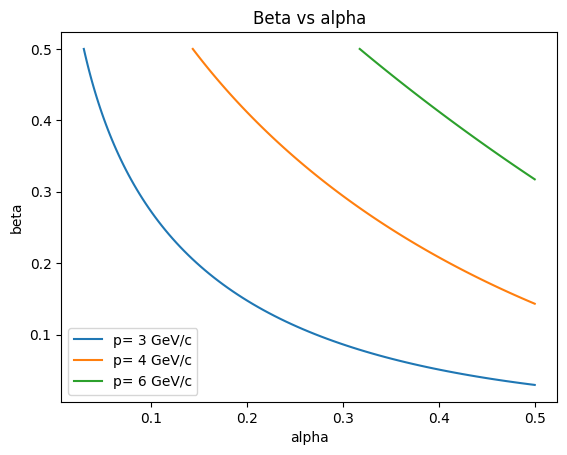

In [10]:
plt.plot(errors_3[:,0],errors_3[:,1],label="p= 3 GeV/c")
plt.plot(errors_4[:,0],errors_4[:,1],label="p= 4 GeV/c")
plt.plot(errors_6[:,0],errors_6[:,1],label="p= 6 GeV/c")
plt.legend()
plt.title("Beta vs alpha")
plt.xlabel("alpha")
plt.ylabel("beta")
plt.show()

### Which momentum value gives better performance and why?

In an ROC plot curves which pass closer to the origin show better performance. 

This is because closer to the origin alpha values can remain small while also keeping beta small. In other words, in this case type I and type II error can both remain small without the need for large tradeoffs in either type of error.

For curves that are further from the origin, reducing one error greatly increases the other, which means poor performance.  

In our results we can see the trend that lower momentum values have curves closer to the origin and hence have better performance. Precisely, we can see p= 6 GeV/c having the worst performance, p= 4 GeV/c having better performance and p= 3 GeV/c having the best performance. 

This can be explained in the following way:

The speed of pions and kaons is lower at smaller values of momentum. This means at smaller values of momentum pions and kaons take a longer time to travel between the two scintillation counters. This also means that the absolute time difference between the pion and kaon travelling between the counters is amplified. 

This results in two gaussian measurements with the same width but with means a larger distance apart. Therefore the likelihood of type I and type II errors is reduced for threshold values between the gaussian means as the gaussians overlap less. 

## Problem 3.1 (2 points):

 total # of events = 43.0 # of bins = 50


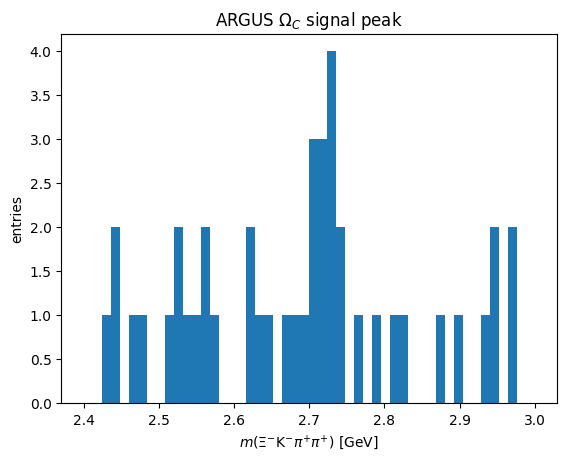

In [53]:
nbins = 50
XMIN = 2.4 # in GeV
XMAX = 3.0 # in GeV
bins = np.linspace(XMIN ,XMAX, nbins)
counts = np.array([0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
                  0, 1, 1, 1, 3, 3, 4, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
                  0, 1, 2, 0, 2, 0, 0]).astype(float)
tot = 0
for i in counts :
    tot += i
print(" total # of events =",tot , "# of bins =",len(counts))
argus_data = plt.hist(bins, bins = len(counts), weights=counts, range=(min(bins), max(bins)))
plt.title("ARGUS $\Omega_C$ signal peak")
plt.xlabel("$m(\Xi^{-} \mathrm{K}^{-} \pi^{+} \pi^{+})$ [GeV]")
plt.ylabel("entries")
plt.show()

### a)

Assuming all events are background, calculating average number of background events per bin.

In [12]:
avg_b = np.sum(argus_data[0])/argus_data[0].size

In [13]:
print("Average number of background events per bin: ",avg_b)

Average number of background events per bin:  0.86


### b)

Location of peak in mass spectrum given by middle of most populated bin

In [14]:
peak_bin = np.argmax(argus_data[0]) # Find bin of mass peak

In [15]:
mass_peak = (argus_data[1][peak_bin]+argus_data[1][peak_bin+1])/2 # Avg the bin boundaries of the peak bin

In [16]:
print("Location of the mass peak is at: ", mass_peak,"Gev")

Location of the mass peak is at:  2.73 Gev


### c)

Counting total number of events around at +/-2.5 sigma window around the mass peak.

+/-2.5 sigma window means counting events within 12\*2.5=30 MeV of each side of the peak. 

Therefore between 2.70 GeV and 2.76 GeV, which corresponds to 5 bins in total, centered around the bin containing the mass peak.

In [17]:
print("Bin containing the peak is: ",peak_bin)

Bin containing the peak is:  27


In [18]:
print("Bin counts of the 5 bins within the +/- 2.5 sigma window: ", argus_data[0][[25,26,27,28,29]])

Bin counts of the 5 bins within the +/- 2.5 sigma window:  [3. 3. 4. 2. 0.]


In [19]:
print("Total number of events within the +/- 2.5 sigma window: ", argus_data[0][[25,26,27,28,29]].sum())

Total number of events within the +/- 2.5 sigma window:  12.0


### d)

In [49]:
print("Estimated number of background events within window: ", avg_b*5)

Estimated number of background events within window:  4.3


In [50]:
prob = 0
for i in range(0,12):
    prob+= poisson.pmf(i,4.3)
p_value = 1-prob

In [51]:
print("Probability of poission distribution with mean N_background to produce N_observed: ", round(p_value,8))

Probability of poission distribution with mean N_background to produce N_observed:  0.00166608


In [52]:
n_sigmas = erfinv(1-p_value)*np.sqrt(2)
print("Number of standard deviations this corresponds to: ",round(n_sigmas,4))

Number of standard deviations this corresponds to:  3.1441


## Problem 3.2 (3 points):

### a)

### Defining the probability density functions

In [24]:
# Generate the flat PDF
def flat_PDF(nbins):
    dist = (1/nbins)
    return dist

In [25]:
#Making sure the guassian is normalised when centered at the edges of the data
def gauss_PDF(x,mean,sigma):
    gauss_dist = lambda x: norm.pdf(x,mean,sigma) 
    area, _ = integrate.quad(gauss_dist,x_low,x_high) # Calculate the normalisation constant
    return (1/area)*norm.pdf(x,mean,sigma)

In [26]:
bin_width = argus_data[1][1]-argus_data[1][0]

In [27]:
bin_centres = np.linspace(2.4+(bin_width/2),3-(bin_width/2),50)

In [28]:
n_events = argus_data[0].sum()

### Fitting assuming no signal

In [55]:
#create a function for the chi squared flat fit
def chisq_flat(intercept):
    n_observed = argus_data[0]
    n_expected = intercept*nbins*flat_PDF(argus_data[0].size)*np.ones(nbins)
    chi_sq_sum = 0
    for i in range(0,nbins):
        if n_expected[i] < 0:
            n_expected[i] = 1e-3
        if n_observed[i] == 0:
            chi_sq_sum += n_expected[i]
        else:    
            chi_sq_sum += (n_expected[i]-n_observed[i])+(n_observed[i]*np.log(n_observed[i]/n_expected[i]))
    chi_sq = 2*chi_sq_sum
    return chi_sq

In [61]:
# Set the minimisation parameters
m = Minuit(chisq_flat, intercept=0.86)
m.limits["intercept"] = (0,1) 

# Set the errors on the initial start values
m.errors=[0.01]

# Set the increase in Chi squared for the 1-SD error calculation
m.errordef=1.0

# Run the minimisation
m = m.migrad()

In [62]:
# Printing the final results and their error
fstr = "{0:2.4f}"
val = m.values["intercept"]
err = m.errors["intercept"]
print("{:2s}".format("intercept"), "=  ", fstr.format(val), " +/- ", fstr.format(err))

intercept =   0.8600  +/-  0.1280


In [63]:
print("Actual intercept:", avg_b)

Actual intercept: 0.86


The fitted H0 intercept is correct to within the error margin, showing that a good fit was made

In [33]:
# Collecting the final fit values
H0_fit_value = m.values["intercept"]

In [34]:
# Calculating the chi_squared value for the final fit
H0_chi_squared = chisq_flat(intercept=H0_fit_value)

### Fitting assuming a gaussian signal

In [35]:
# Create function for chi squared combined fit
def chisq_combined(intercept,F):
    n_observed = argus_data[0]
    # Separately normalised counts
    n_expected_back = intercept*nbins*flat_PDF(argus_data[0].size)*np.ones(nbins) 
    n_expected_sig = n_events*bin_width*gauss_PDF(bin_centres,mean,sigma)
    # Combine separately normalised counts
    n_expected = ((1-F) * n_expected_back) + (F * n_expected_sig) 
    chi_sq_sum = 0
    for i in range(0,nbins):
        if n_expected[i] < 0:
            n_expected[i] = 1e-3
        if n_observed[i] == 0:
            chi_sq_sum += n_expected[i] # Handling log(0)
        else:    
            chi_sq_sum += (n_expected[i]-n_observed[i])+(n_observed[i]*np.log(n_observed[i]/n_expected[i]))
    chi_sq = 2*chi_sq_sum
    return chi_sq

In [36]:
H1_chisq_vals = np.array([])
sigma=0.012
for mean in bin_centres:

    # Setting the range of our mass data for use in normalisation
    x_low = XMIN # 2.4 GeV
    x_high = XMAX # 3.0 GeV
    
    # Set the minimisation parameters
    m = Minuit(chisq_combined, intercept=0.86, F=0.1)
    m.limits["intercept"] = (0.0,1.0) 
    m.limits["F"] = (0.0,1.0)

    # Set the errors on the initial start values
    m.errors=[0.1,0.1]

    # Set the increase in Chi squared for the 1-SD error calculation
    m.errordef=1.0

    # Run the minimisation
    m = m.migrad()
    
    # Calculating the chi squared for the final fits
    chi_sq = chisq_combined(m.values["intercept"],m.values["F"])
    H1_chisq_vals = np.append(H1_chisq_vals,chi_sq)

### Calculating the chi-squared difference between the two hypotheses

In [37]:
print("Chi-squared for H0: ",round(H0_chi_squared,4))

Chi-squared for H0:  56.6526


In [38]:
chi_sq_diff = H0_chi_squared-H1_chisq_vals

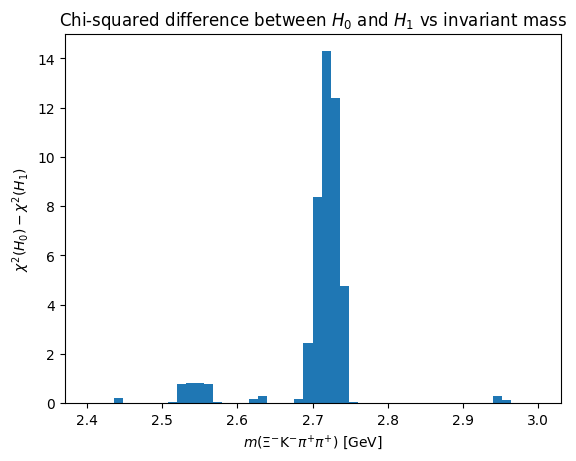

In [39]:
chi_sq_diff_hist = plt.hist(bin_centres,bins=argus_data[1],weights=chi_sq_diff)
plt.title("Chi-squared difference between $H_0$ and $H_1$ vs invariant mass")
plt.xlabel("$m(\Xi^{-} \mathrm{K}^{-} \pi^{+} \pi^{+})$ [GeV]")
plt.ylabel("$\chi^2(H_0)-\chi^2(H_1)$")
plt.show()

### Finding the p-value using max chi-squared difference

In [40]:
max_val = np.amax(chi_sq_diff)
max_bin = np.argmax(chi_sq_diff)
inv_mass_peak = bin_centres[max_bin]

In [41]:
print("Largest chi-squared difference is",round(max_val,4),"at bin",max_bin,"corresponding to",inv_mass_peak,"GeV")

Largest chi-squared difference is 14.2898 at bin 26 corresponding to 2.718 GeV


In [42]:
pvalue = 1 - scipy.stats.chi2.cdf(np.amax(chi_sq_diff),1) 
print("The p-value is: ",pvalue)

The p-value is:  0.00015671464665678592


### Finding the Z-score

In [43]:
n_sigmas = erfinv(1 - pvalue )* np.sqrt(2)
print("The Z-score is: ",n_sigmas)

The Z-score is:  3.7801805932541326


These results show that for this signal to be a fluctuation, this fluction would occur over 3.7 standard deviations away from the average results that would be expected if there was no signal. This means the hypothesis that there is a signal is strongly favoured as such a fluctuation is highly improbable.